In [1]:
from helpers import *
import pandas as pd

In [2]:
#2.2
simulator1 = queuSim(capacity=1, numSim=5)
simulator2 = queuSim(capacity=2, numSim=5)
simulator4 = queuSim(capacity=4, numSim=5)

In [3]:
waitTimes1 = simulator1.runSim()
waitTimes2 = simulator2.runSim()
waitTimes4 = simulator4.runSim()

In [4]:
# we can reject the null hypothesis
st.f_oneway(waitTimes1, waitTimes2, waitTimes4)

c:\users\jwant\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\stats.py:3709: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


F_onewayResult(statistic=array([        nan,         nan,  1.50361295,  1.00511905,  1.31037212,
        1.54649183,  1.34733942,  1.21288358,  1.61147591,  1.197736  ,
        5.07296385,  2.41344306,  4.6435259 ,  3.18862252,  2.30838871,
        2.48377105,  2.3209484 ,  2.21798909,  3.42174361,  2.21995726,
        3.99682125,  3.85656154,  3.5067047 ,  3.03707181,  1.20972834,
        1.07534104,  0.98237217,  1.54027533,  1.3151897 ,  2.30580802,
        1.68113732,  1.92021835,  3.237944  ,  3.59341592,  2.49125013,
        2.5909887 ,  2.30887242,  2.00208581,  2.27898091,  2.37005125,
        1.74266898,  1.67364278,  1.90577201,  2.25090899,  2.50319787,
        2.69070225,  3.34849509,  2.44140161,  2.70263484,  1.82831575,
        1.55943959,  1.42306204,  1.56235013,  1.63829044,  1.99721041,
        1.61727645,  1.86742198,  3.31981448,  3.97105362,  3.11203081,
        2.86933377,  3.46025989,  2.24101817,  2.74843864,  2.87972759,
        3.33385862,  3.99604986,  4.064

In [5]:
# post hoc tests prove that there are differences between all populations
print(st.ttest_ind(waitTimes1, waitTimes4))
print(st.ttest_ind(waitTimes1, waitTimes2))
print(st.ttest_ind(waitTimes2, waitTimes4))

Ttest_indResult(statistic=array([       nan,        nan, 1.74431836, 1.32457181, 1.98929183,
       1.94760398, 2.07308248, 1.45898766, 1.19194214, 0.75704204,
       2.76683809, 2.0846981 , 2.87976334, 2.53090941, 2.0026786 ,
       1.97580881, 1.95989937, 1.60462552, 2.81114734, 1.79029099,
       2.17914943, 2.26517454, 2.23069513, 2.6459236 , 1.68553269,
       1.65305665, 1.34562703, 1.70786537, 1.47151388, 2.17918169,
       2.15403554, 2.34484142, 2.81104467, 3.29562673, 3.33933624,
       3.12061295, 2.70488977, 2.12921759, 2.51795936, 2.70018436,
       1.91089999, 1.86200086, 1.84544505, 1.99542745, 2.12457268,
       2.07073536, 2.39877143, 2.03117746, 2.31290683, 1.93215544,
       1.77057477, 1.63016317, 1.75660595, 1.71694589, 1.93214854,
       1.84989085, 2.07546128, 3.16359588, 3.19222263, 2.80812897,
       2.73715816, 3.02133532, 2.19890424, 2.42515584, 2.49908632,
       2.51376844, 2.85943612, 2.7401602 , 2.65291972, 2.59745681,
       2.65481889, 2.935017  , 3.183

In [6]:
# 2.2, run multiple simulations for different p
# service time is fixed at 2 
# customer intervals gets scaled for the amount of servers
# p = 2/intervalcustomers
p = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
intervalCustomers = 2/p
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=50, newCustomers = 500, intervalCustomers = time)
    simulator2 = queuSim(capacity=2, numSim=50, newCustomers = 500, intervalCustomers = time)
    simulator4 = queuSim(capacity=4, numSim=50, newCustomers = 500, intervalCustomers = time)
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

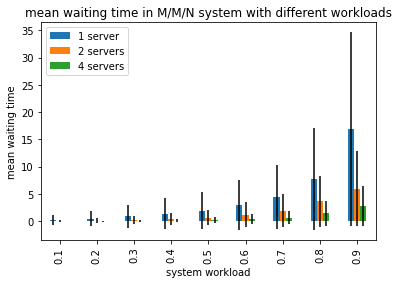

In [7]:
dfAll = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAll.plot.bar(title = "mean waiting time in M/M/N system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [8]:
# assignment 2.3, use a different service strategy. Shortest job first(SJF).
p = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
intervalCustomers = 2/p
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=50, newCustomers = 500, helpStrat = "SJF", intervalCustomers = time)
    simulator2 = queuSim(capacity=2, numSim=50, newCustomers = 500, helpStrat = "SJF", intervalCustomers = time)
    simulator4 = queuSim(capacity=4, numSim=50, newCustomers = 500, helpStrat = "SJF", intervalCustomers = time)
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

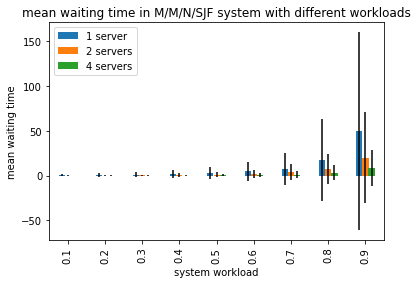

In [9]:
dfAllSJF = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllSJF.plot.bar(title = "mean waiting time in M/M/N/SJF system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [10]:
##2.4
# Deterministic sercive distribution
p = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
intervalCustomers = 2/p
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=50, newCustomers = 500, intervalCustomers = time, serviceDistribution = "D")
    simulator2 = queuSim(capacity=2, numSim=50, newCustomers = 500, intervalCustomers = time, serviceDistribution = "D")
    simulator4 = queuSim(capacity=4, numSim=50, newCustomers = 500, intervalCustomers = time, serviceDistribution = "D")
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

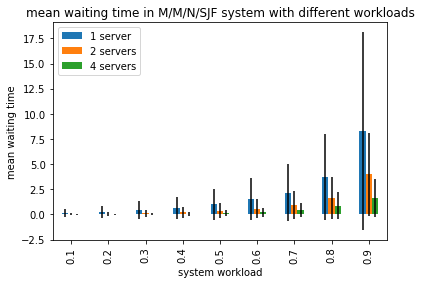

In [11]:
dfAllDet = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllDet.plot.bar(title = "mean waiting time in M/M/N/SJF system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)

In [12]:
##2.4
# Deterministic sercive distribution
p = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
intervalCustomers = 2/p
means1 = []
means2 = []
means4 = []
err1 = []
err2 = []
err4 = []

for count, time in enumerate(intervalCustomers):
    simulator1 = queuSim(capacity=1, numSim=50, newCustomers = 500, intervalCustomers = time, serviceDistribution = "H")
    simulator2 = queuSim(capacity=2, numSim=50, newCustomers = 500, intervalCustomers = time, serviceDistribution = "H")
    simulator4 = queuSim(capacity=4, numSim=50, newCustomers = 500, intervalCustomers = time, serviceDistribution = "H")
    
    result1 = simulator1.runSim()
    result2 = simulator2.runSim()
    result4 = simulator4.runSim()
    
    means1.append(np.mean(result1))
    means2.append(np.mean(result2))
    means4.append(np.mean(result4))
    
    err1.append(np.std(result1))
    err2.append(np.std(result2))
    err4.append(np.std(result4))

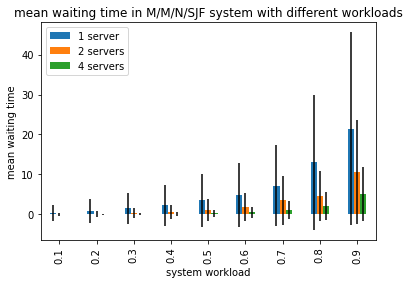

In [13]:
dfAllHyp = pd.DataFrame({'1 server': means1,
                      '2 servers': means2,
                      '4 servers': means4}, index = p) 

ax = dfAllHyp.plot.bar(title = "mean waiting time in M/M/N/SJF system with different workloads",
               ylabel = "mean waiting time", xlabel="system workload", yerr=[err1, err2,err4])
ax.legend(loc=2)